**DESY AYURIANTI**

**3E D4 TI / 07**

**21417210119**

# Tugas

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv. 

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [186]:
df = pd.read_csv("voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Encode

In [187]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df['label'].head() 

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

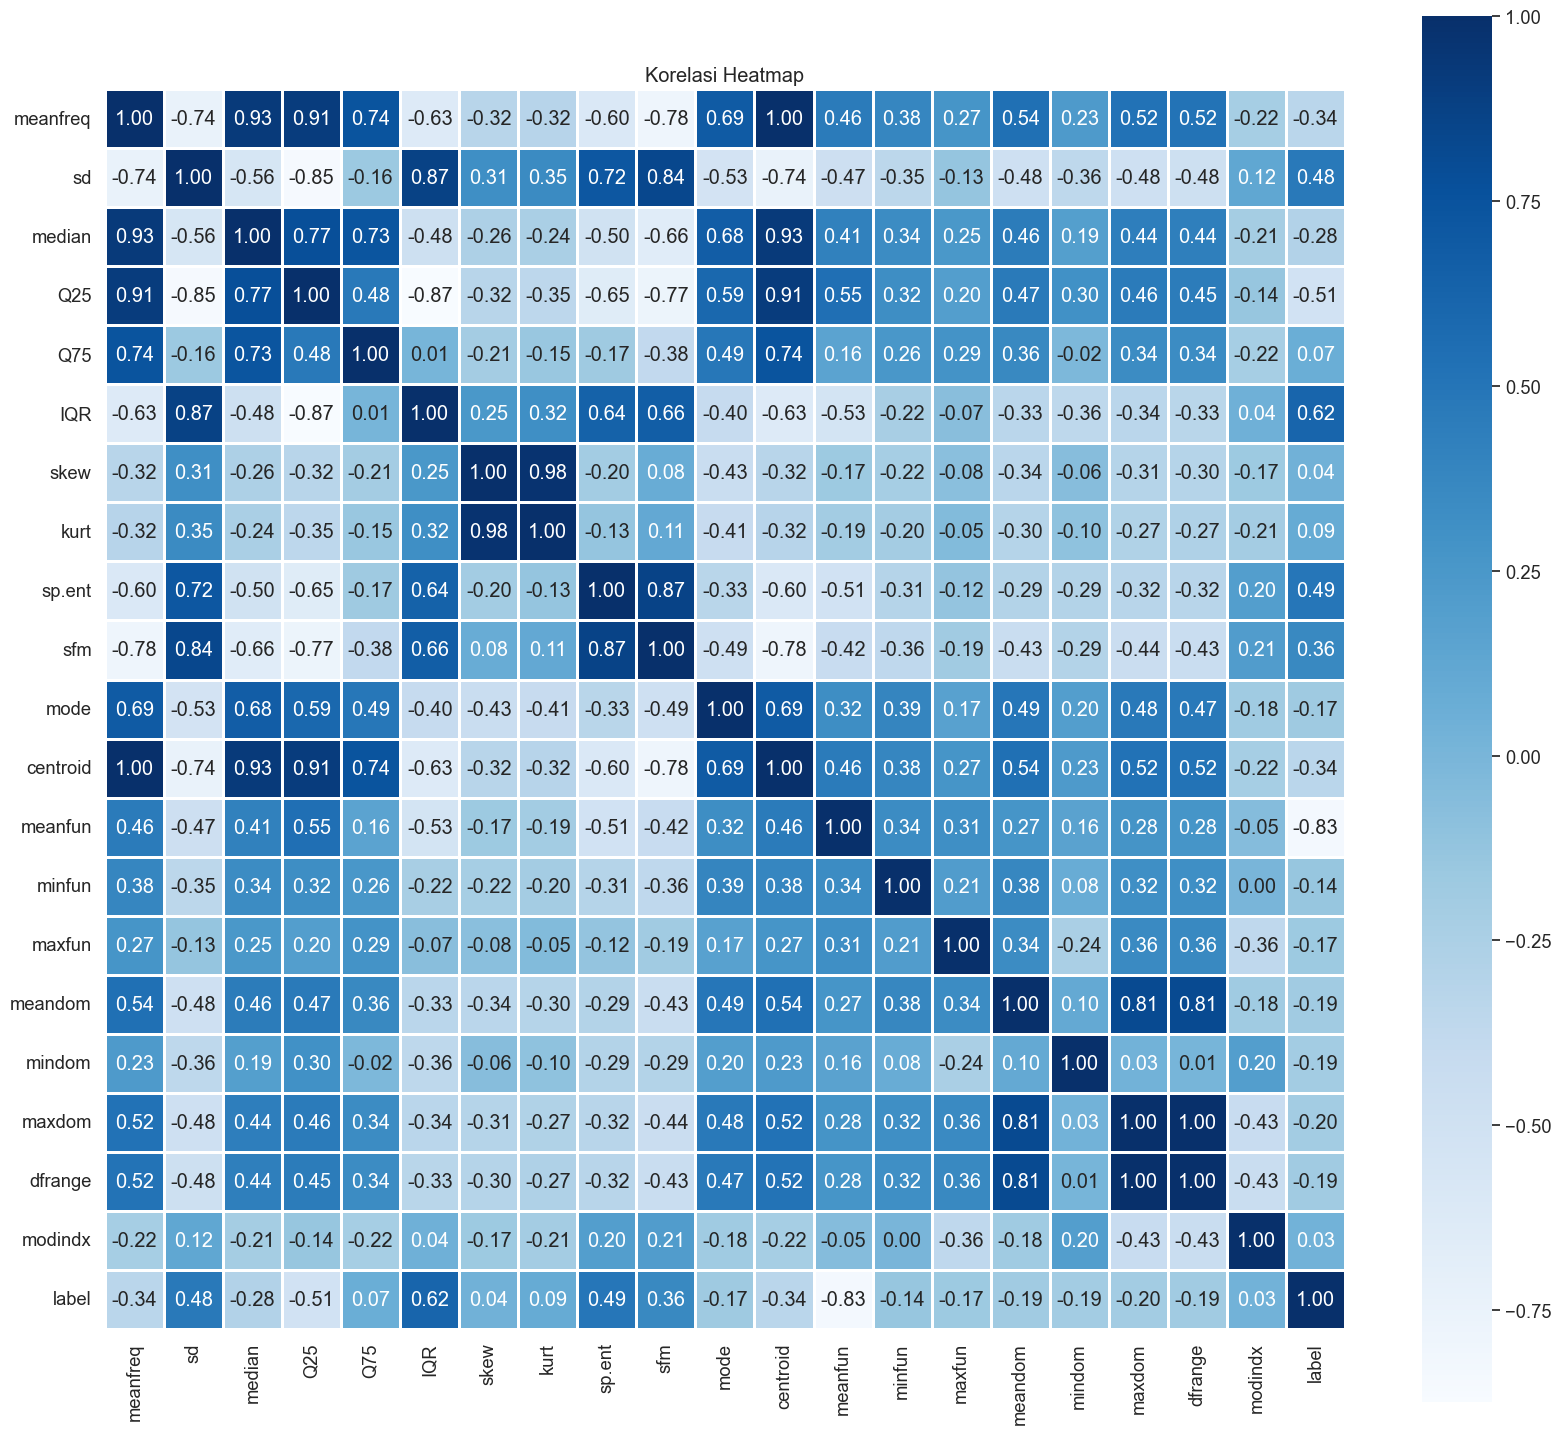

In [188]:
plt.figure(figsize=(20, 18))
corr_matrix = df.corr()
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, cmap='Blues', linewidths=1, fmt=".2f", annot=True, cbar=True, square=True)

plt.title('Korelasi Heatmap')
plt.show()

In [189]:
# Pisahkan fitur (X) dan label (y)
X = df.drop('label', axis=1)
y = df['label']

# Normalisasi fitur (opsional, tergantung pada data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [192]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = svm_model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {int(accuracy * 100)}%')

# Laporan klasifikasi
report = classification_report(y_test, y_pred)
print(f'Laporan Klasifikasi:\n{report}')


Accuracy Score : 97%
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       297
           1       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

    1. Menggunakan data spam.csv
    2. Fitur CountVectorizer dengan mengaktifkan stop_words
    3. Evaluasi hasilnya


In [193]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head() 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Drop Column

In [194]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Rename Column

In [195]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'Message'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [196]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Labels   5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                 Message
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


Encoding

In [197]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Pisah fitur dengan Label

In [198]:
X = df['Message'].values
y = df['Labels'].values


Ekstraksi Fitur

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Inisiasi CountVectorizer & Penggunaan stop_words
cv = CountVectorizer(stop_words = 'english')

# Fitting dan transform X_train dengan CountVectorizer
X_train = cv.fit_transform(X_train)

# Transform X_test
X_test = cv.transform(X_test)

In [200]:
X_train
y_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [201]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
model = MultinomialNB()

# Fit model
model.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = model.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data pengujian
y_pred_test = model.predict(X_test)

# Evaluasi akurasi data pengujian
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')


Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9838565022421525


3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

    1. Menggunakan data spam.csv
    2. Fitur TF-IDF dengan mengaktifkan stop_words
    3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
    4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [202]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head() 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Drop Column

In [203]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Rename Column

In [204]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'Message'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Encoding

In [205]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Pisah Fitur dengan Label

In [206]:
X = df['Message']
y = df['Labels']

Count Vectorizer dengan stopwords

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.3)

cv2 = CountVectorizer(stop_words = 'english')

X_train = cv2.fit_transform(X_train)
X_test = cv2.transform(X_test)

In [208]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:2f}%')
print(f'Hasil akurasi data test: {acc_test * 100:2f}%')

Hasil akurasi data train: 99.358974%
Hasil akurasi data test: 98.325359%


TF-IDF dengan stop words

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

tfidf = TfidfVectorizer(stop_words = 'english')

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [210]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:2f}%')
print(f'Hasil akurasi data test: {acc_test * 100:2f}%')

Hasil akurasi data train: 98.282051%
Hasil akurasi data test: 96.411483%


# Kesimpulan

Hasil evaluasi multiniminal Naive Bayesian menggunakan CountVectorizer dan TF-IDF adalah : 
1. Nilai akurasi data latih menggunakan CountVectorizer adalah 99.35%

2. Nilai akurasi data uji menggunakan CountVectorizer adalah 98.32%

3. Akurasi data latih menggunakan TF-IDF mencapai sekitar 98,28%.

4. Akurasi data uji menggunakan TF-IDF sekitar 96,41%.

Perbandingan akurasi antara COuntVectorizer dan TF-IDF tidak jauh berbeda. Akan tetapi TF-IDF lebih fleksibel karena mampu menangani kasus pemrosesan teks sehingga untuk kasus dengan data spam.cv ini TF-IDF lebih sesuai untuk digunakan karena karateristik dari datanya adalah teks. 